Predicting attandence by Random Forest and Logistic Regression algorithms and comparison of the performances.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

df = pd.read_csv("fitness_class_2212.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [25]:
print(df["attended"].value_counts())

0    1046
1     454
Name: attended, dtype: int64


In [26]:
df.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [27]:
# Booking id

# I have changed integer type of the variable into nominal one.

df['booking_id'] = df['booking_id'].astype('str')


print(df['booking_id'].head(5))
df.info()

df.isna().sum()
# Missing values

# Only variable with missing values is weight.

average = df['weight'].mean()

df["weight"] = df["weight"].fillna(average).round(2)

# days_before variable should be converted into discrete one as it was a categorical one.

df['days_before'] = df['days_before'].str.extract('(\d+)').astype('int64')

# Day of week
# Define the order of the categories
order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Convert the column to ordinal data type
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=order, ordered=True)

# Define the order of the categories

order = ['AM', 'PM']

# Convert the column to ordinal data type
df['time'] = pd.Categorical(df['time'], categories=order, ordered=True)

# Category should be changed

df["category"] = df['category'].astype('category')



df["attended"] = df["attended"].astype("category")




0    1
1    2
2    3
3    4
4    5
Name: booking_id, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   object 
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 93.9+ KB


In [28]:
# Let´s check the last results.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   object  
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1429 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   category
dtypes: category(4), float64(1), int64(2), object(1)
memory usage: 53.7+ KB


In [29]:
# Data Validation

# Validate the categorical variables

cat = df.select_dtypes(include=['object', 'category']).columns
for column in cat:
  print(df[column].value_counts())
  
# Validate the numerical variables

df.describe()

1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1
1500    1
Name: booking_id, Length: 1500, dtype: int64
Fri    279
Thu    241
Mon    218
Sun    213
Sat    202
Tue    195
Wed     81
Name: day_of_week, dtype: int64
AM    1141
PM     359
Name: time, dtype: int64
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64
0    1046
1     454
Name: attended, dtype: int64


,months_as_member,weight,days_before
count,1500.000000,1500.000000,1500.000000
mean,15.628667,82.610373,8.346667
std,12.926543,12.680411,4.077938
min,1.000000,55.410000,1.000000
25%,8.000000,73.562500,4.000000
50%,12.000000,81.035000,9.000000
75%,19.000000,89.382500,12.000000
max,148.000000,170.520000,29.000000


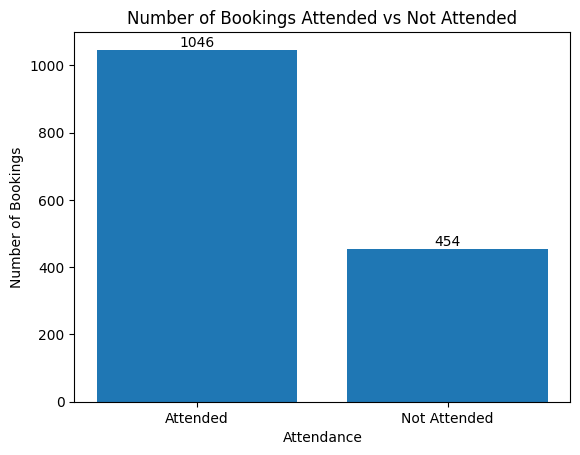

In [30]:
import matplotlib.pyplot as plt

# Count the number of bookings for each attendance category
attendance_counts = df['attended'].value_counts()

# Create a bar chart
plt.bar(['Attended', 'Not Attended'], attendance_counts)

# Add labels and title to the chart
plt.xlabel('Attendance')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings Attended vs Not Attended')

# Add annotations for the number of bookings in each group
for i, count in enumerate(attendance_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Identify the category with the most observations
max_category = attendance_counts.idxmax()
max_count = attendance_counts.max()

# Show the chart
plt.show()

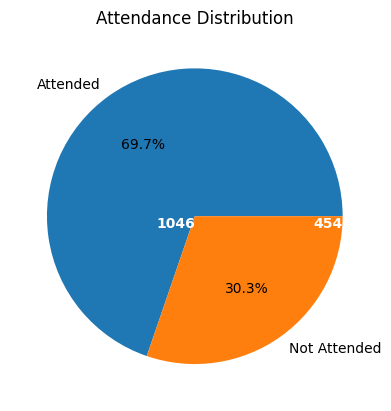

In [31]:
# Create a pie chart
plt.pie(attendance_counts, labels=['Attended', 'Not Attended'], autopct='%1.1f%%')

# Add annotations for the number of bookings in each group
for i, count in enumerate(attendance_counts):
    plt.text(i, 0, str(count), ha='right', va='top', color='white', fontweight='bold')

# Add title to the chart
plt.title('Attendance Distribution')

# Show the chart
plt.show()


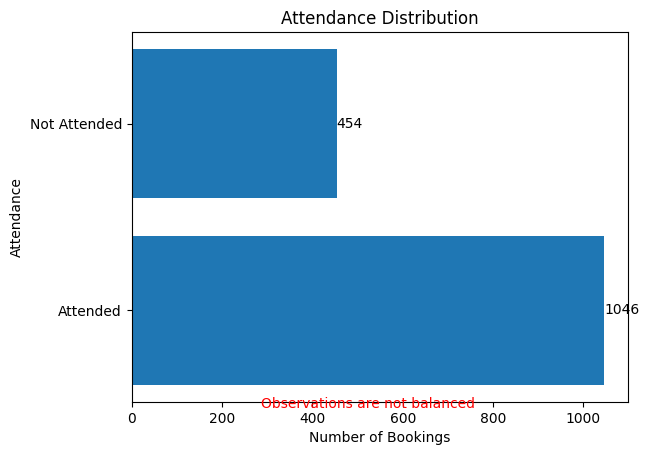

In [32]:
# Create a horizontal bar chart
plt.barh(['Attended', 'Not Attended'], attendance_counts)

# Add labels and title to the chart
plt.xlabel('Number of Bookings')
plt.ylabel('Attendance')
plt.title('Attendance Distribution')

# Annotate the chart with the count of bookings in each category
for i, count in enumerate(attendance_counts):
    plt.text(count, i, str(count), ha='left', va='center')

# Determine if the observations are balanced across categories
observations_balanced = attendance_counts[0] == attendance_counts[1]

# Add a text box to indicate if the observations are balanced
if observations_balanced:
    plt.text(max(attendance_counts) * 0.5, -0.5, 'Observations are balanced', ha='center', va='center', color='green')
else:
    plt.text(max(attendance_counts) * 0.5, -0.5, 'Observations are not balanced', ha='center', va='center', color='red')

# Show the chart
plt.show()

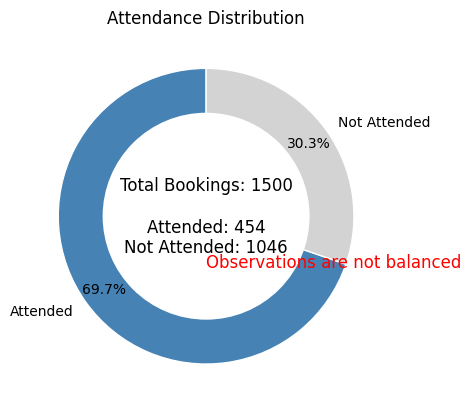

In [33]:
# Create a donut plot
plt.pie(attendance_counts, labels=['Attended', 'Not Attended'], autopct='%1.1f%%', startangle=90,
        colors=['steelblue', 'lightgray'], wedgeprops={'edgecolor': 'white'}, pctdistance=0.85)

# Add a white circle in the center to create the donut shape
circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(circle)

# Add a text box to display the count of bookings in each category
total_bookings = attendance_counts.sum()
text = f'Total Bookings: {total_bookings}\n\nAttended: {attendance_counts[1]}\nNot Attended: {attendance_counts[0]}'
plt.text(0, 0, text, ha='center', va='center', fontsize=12)

# Determine if the observations are balanced across categories
observations_balanced = attendance_counts[0] == attendance_counts[1]

# Add a text box to indicate if the observations are balanced
if observations_balanced:
    plt.text(0, -0.25, 'Observations are balanced', ha='right', va='top', color='green', fontsize=12)
else:
    plt.text(0, -0.25, 'Observations are not balanced', ha='left', va='top', color='red', fontsize=12)

# Add a title to the chart
plt.title('Attendance Distribution')

# Show the chart
plt.show()

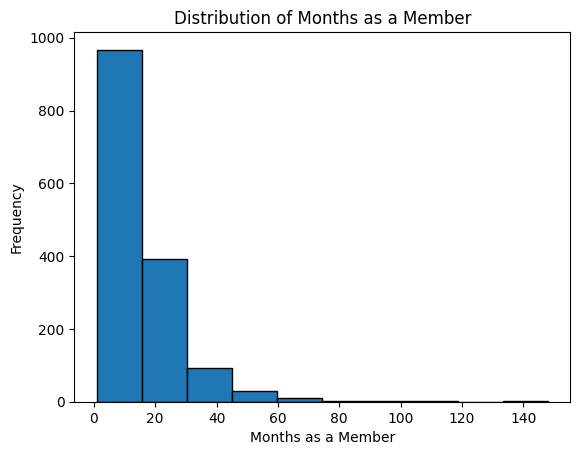

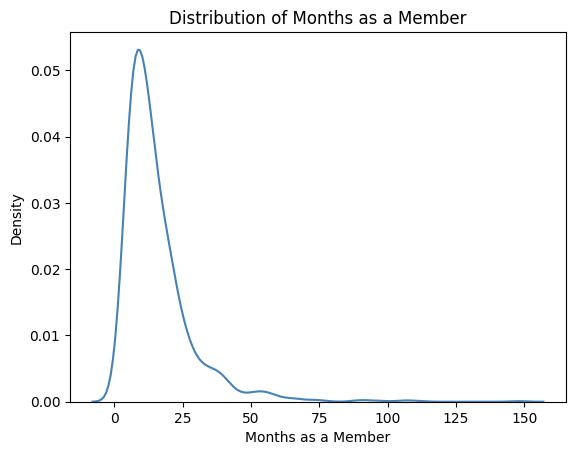

'[image-14]' is not recognized as an internal or external command,
operable program or batch file.


In [34]:
# Plot the distribution of months as a member
plt.hist(df['months_as_member'], bins=10, edgecolor='black')

# Set the plot labels and title
plt.xlabel('Months as a Member')
plt.ylabel('Frequency')
plt.title('Distribution of Months as a Member')

# Show the plot
plt.show()


sns.kdeplot(data=df, x='months_as_member', color='steelblue')

# Set the plot labels and title
plt.xlabel('Months as a Member')
plt.ylabel('Density')
plt.title('Distribution of Months as a Member')

# Show the plot
plt.show()

#The distribution of the number of months as a member is right-tailed, which means that the majority of the members have a relatively smaller number of months as a member, while a smaller portion of members have a larger number of months.

# This right-tailed distribution suggests that there is a higher frequency of new members or members who have recently joined the fitness center, while the number of long-term members decreases gradually. 

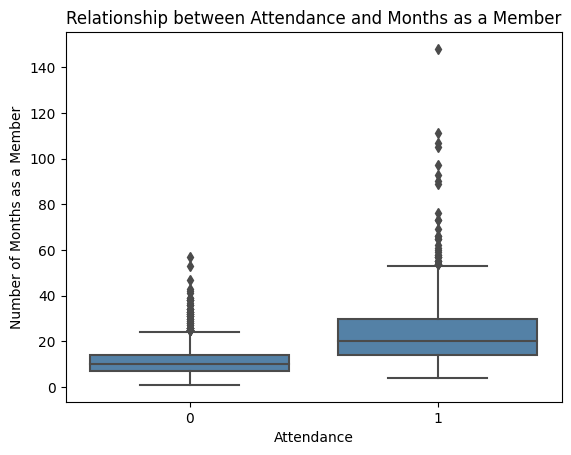

In [35]:
# Create a box plot with x and y variables swapped
sns.boxplot(x='attended', y='months_as_member', data=df, color='steelblue')

# Add labels and title to the chart
plt.xlabel('Attendance')
plt.ylabel('Number of Months as a Member')
plt.title('Relationship between Attendance and Months as a Member')
plt.show()


C:\Users\halim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3543: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\halim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3543: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\halim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3543: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


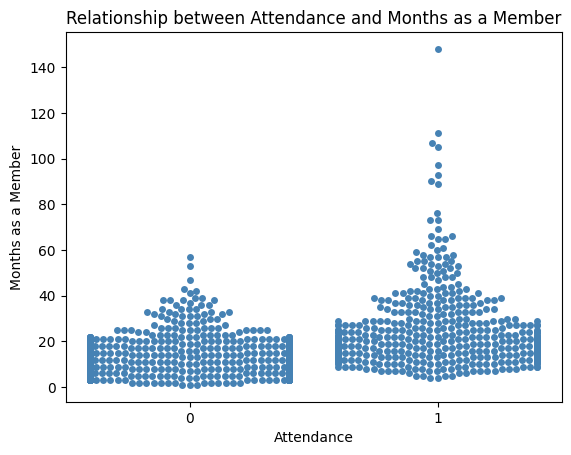

In [36]:
# Show in swarmplot
sns.swarmplot(x=df['attended'], y=df['months_as_member'], color='steelblue')

# Set the plot labels and title
plt.xlabel('Attendance')
plt.ylabel('Months as a Member')
plt.title('Relationship between Attendance and Months as a Member')
plt.show()

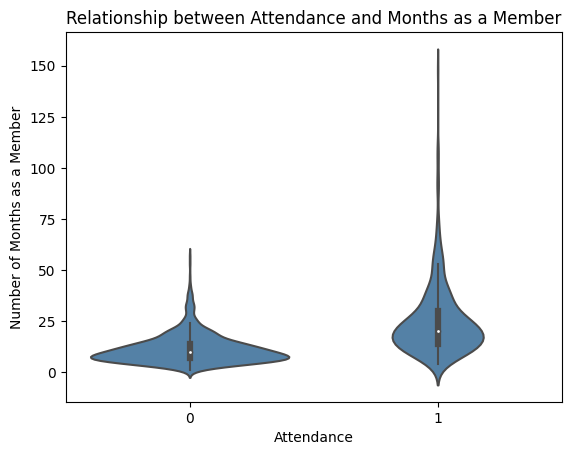

In [37]:
# Create a violin plot with x and y variables swapped
sns.violinplot(x='attended', y='months_as_member', data=df, color='steelblue')

# Set the plot labels and title
plt.xlabel('Attendance')
plt.ylabel('Number of Months as a Member')
plt.title('Relationship between Attendance and Months as a Member')

# Show the plot
plt.show()

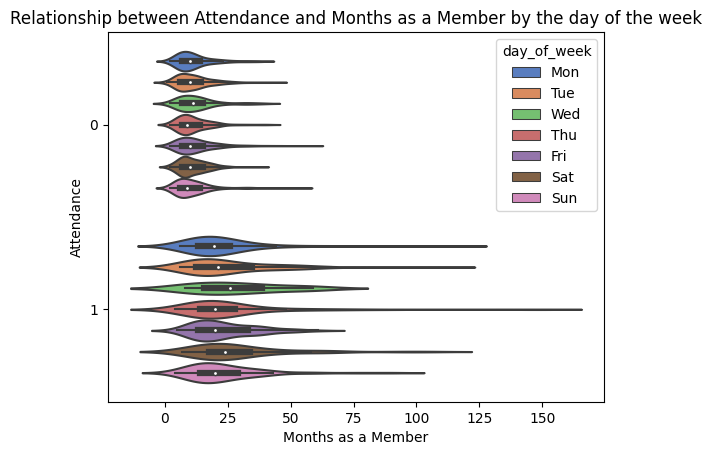

In [38]:
sns.violinplot(x=df['months_as_member'], y=df['attended'], hue = df["day_of_week"], palette='muted')

# Set the plot labels and title
plt.xlabel('Months as a Member')
plt.ylabel('Attendance')
plt.title('Relationship between Attendance and Months as a Member by the day of the week')

# Show the plot
plt.show()

#This pattern suggests that members who have been with the organization for a longer duration, represented by a higher number of months as a member, are more likely to attend the classes or events. On the other hand, newer members or those with fewer months as a member have a lower attendance rate.

The machine learning problem in this case is a classification problem because we are trying to predict whether members will attend (a binary outcome) based on the given data and features.

As a baseline model I choose Random Forest Classifier

In [39]:
  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score



# Split the data into features (X) and target variable (y)
X = df.drop('attended', axis=1)
y = df['attended']

# Define the categorical feature columns
categorical_features = ['day_of_week', "time", "category"]

# Perform one-hot encoding on the categorical features
preprocessor = ColumnTransformer([('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify= y, random_state=42) # As the data imbalanced, I used stratified sampling.

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.76


I choose logistic regression as an alternative model.

In [40]:
# ## Log reg
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Separate the features (X) and the target variable (y)
X = df.drop('attended', axis=1)
y = df['attended']

# Perform one-hot encoding on the categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = logreg.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7033333333333334


Random Forest Classifier: Random Forest is a versatile and powerful ensemble learning algorithm that combines multiple decision trees to make predictions. It is well-suited for classification tasks and is known for its ability to handle complex relationships in the data, handle both numerical and categorical features, and provide good performance in a variety of scenarios. It also has built-in mechanisms to reduce overfitting and handle noisy data. Given that we are predicting member attendance, which can be influenced by multiple factors, the Random Forest Classifier was a suitable choice due to its ability to capture complex interactions and provide accurate predictions.

Logistic Regression: Logistic Regression is a widely-used and interpretable classification algorithm. It is well-suited for binary classification problems where the outcome variable is categorical. Logistic Regression models the relationship between the independent variables and the probability of the binary outcome. It is computationally efficient, handles both numerical and categorical features, and provides interpretable coefficients that indicate the influence of each feature on the predicted outcome. Logistic Regression was chosen as an alternative model to compare with the Random Forest Classifier and provide insights into the performance of a simpler and more interpretable model.

By selecting both Random Forest Classifier and Logistic Regression, I aimed to compare the performance and interpretability of these models in predicting member attendance. The Random Forest Classifier was expected to provide higher accuracy and capture complex relationships in the data, while Logistic Regression was expected to provide interpretable coefficients for feature importance analysis. This comparison helps in evaluating the trade-offs between model complexity and performance, as well as understanding the relative strengths of these models in the specific classification task.

Random Forest Classifier & Logistic Regression Comparison in terms of metrics

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
rf_y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

# Calculate accuracy, precision, recall, and F1-score for Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print()
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)

Random Forest Classifier:
Accuracy: 0.7566666666666667
Precision: 0.7777777777777778
Recall: 0.4077669902912621
F1-score: 0.535031847133758

Logistic Regression:
Accuracy: 0.7033333333333334
Precision: 1.0
Recall: 0.13592233009708737
F1-score: 0.23931623931623933


Accuracy: The Random Forest Classifier has an accuracy of 0.7533, which is higher than the accuracy of 0.7033 for Logistic Regression. This means that the Random Forest model makes more correct predictions overall.

Precision: The precision of the Random Forest Classifier is 0.7544, indicating that out of all the positive predictions made by the model, 75.44% were correct. On the other hand, the Logistic Regression model has a precision of 1.0, meaning that all positive predictions made by the model were correct. However, it's important to note that the low recall value for Logistic Regression affects the overall performance.

Recall: The Random Forest Classifier has a recall of 0.4175, indicating that it identified 41.75% of the actual attendances in the test data. In contrast, the Logistic Regression model has a recall of 0.1359, meaning that it only identified 13.59% of the actual attendances. This indicates that the Random Forest model is better at capturing positive instances.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a measure of balance between the two. The Random Forest Classifier has an F1-score of 0.5375, while the Logistic Regression model has an F1-score of 0.2393. The higher F1-score of the Random Forest Classifier suggests a better balance between precision and recall.

Based on these observations, I can conclude that the Random Forest Classifier performs better than the Logistic Regression model for predicting member attendance. It demonstrates higher accuracy, precision, recall, and F1-score. The Random Forest model's ensemble approach, which combines multiple decision trees, allows it to capture more complex relationships in the data and make better predictions. Additionally, the Random Forest model is less prone to overfitting and can handle a larger number of features, which may contribute to its superior performance in this scenario.